In [1]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from ipywidgets import Layout
from ipywidgets import widgets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
#Read the CSV file
datasetInterview = pd.read_csv('datasetInterview.csv',  sep=';')
datasetInterview = pd.DataFrame(datasetInterview)

datasetInterview

,READING_ID,PARAMETER,IDX,PARAM_VALUE
0,0,DRIVE_SPEED,0,7.40
1,0,FUEL_EFF,0,3.76
2,0,GCW,1,0.00
3,0,GCW,2,0.00
4,0,GCW,3,1.32
...,...,...,...,...
1048570,1136695010,GCW,19,0.16
1048571,1136695010,GCW,20,0.85
1048572,1136695010,GCW,21,2.50
1048573,1136695010,GCW,22,7.82


In [3]:
#Data information
shape_data = datasetInterview.shape
duplicated_data = sum(datasetInterview.duplicated())
types_data = datasetInterview.dtypes
null_data = datasetInterview.isnull().sum()
unique_data = datasetInterview.nunique()

print('Shape:',shape_data)
print('')
print('Duplicate rows:', duplicated_data)
print('')
print('Datatypes of columns:','\n',types_data)
print('')
print('Rows with missing data:','\n',null_data)
print('')
print('Number of non-null unique values for features:','\n',unique_data)

Shape: (1048575, 4)

Duplicate rows: 0

Datatypes of columns: 
 READING_ID       int64
PARAMETER       object
IDX              int64
PARAM_VALUE    float64
dtype: object

Rows with missing data: 
 READING_ID     0
PARAMETER      0
IDX            0
PARAM_VALUE    0
dtype: int64

Number of non-null unique values for features: 
 READING_ID     19419
PARAMETER          7
IDX               30
PARAM_VALUE     6950
dtype: int64


In [4]:
#Transpose the parameter column values
datasetInterview_trans = datasetInterview.pivot_table(index=['READING_ID', 'IDX'], columns='PARAMETER', values='PARAM_VALUE').reset_index(col_level=1)
datasetInterview_trans = datasetInterview_trans[['READING_ID', 'IDX', 'DRIVE_SPEED', 'FUEL_EFF', 'GCW', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3', 'SPEED']]

datasetInterview_new = pd.DataFrame({'READING_ID': datasetInterview_trans['READING_ID'],
                    'IDX': datasetInterview_trans['IDX'],
                    'DRIVE_SPEED': datasetInterview_trans['DRIVE_SPEED'],
                    'FUEL_EFF': datasetInterview_trans['FUEL_EFF'],
                    'GCW': datasetInterview_trans['GCW'],
                    'SLOPE_1': datasetInterview_trans['SLOPE_1'],
                    'SLOPE_2': datasetInterview_trans['SLOPE_2'],
                    'SLOPE_3': datasetInterview_trans['SLOPE_3'],
                    'SPEED': datasetInterview_trans['SPEED']})

In [5]:
datasetInterview_new

,READING_ID,IDX,DRIVE_SPEED,FUEL_EFF,GCW,SLOPE_1,SLOPE_2,SLOPE_3,SPEED
0,0,0,7.4,3.76,NaN,7.66,3.81,0.37,NaN
1,0,1,NaN,NaN,0.00,NaN,NaN,NaN,23.36
2,0,2,NaN,NaN,0.00,NaN,NaN,NaN,2.55
3,0,3,NaN,NaN,1.32,NaN,NaN,NaN,2.19
4,0,4,NaN,NaN,0.00,NaN,NaN,NaN,1.09
...,...,...,...,...,...,...,...,...,...
582559,1136695010,19,NaN,NaN,0.16,NaN,NaN,NaN,NaN
582560,1136695010,20,NaN,NaN,0.85,NaN,NaN,NaN,NaN
582561,1136695010,21,NaN,NaN,2.50,NaN,NaN,NaN,NaN
582562,1136695010,22,NaN,NaN,7.82,NaN,NaN,NaN,NaN


In [6]:
#Data_new information
shape_data = datasetInterview_new.shape
duplicated_data = sum(datasetInterview_new.duplicated())
types_data = datasetInterview_new.dtypes
null_data = datasetInterview_new.isnull().sum()
unique_data = datasetInterview_new.nunique()

print('Shape:',shape_data)
print('')
print('Duplicate rows:', duplicated_data)
print('')
print('Datatypes of columns:','\n',types_data)
print('')
print('Rows with missing data:','\n',null_data)
print('')
print('Number of non-null unique values for features:','\n',unique_data)

Shape: (582564, 9)

Duplicate rows: 0

Datatypes of columns: 
 READING_ID       int64
IDX              int64
DRIVE_SPEED    float64
FUEL_EFF       float64
GCW            float64
SLOPE_1        float64
SLOPE_2        float64
SLOPE_3        float64
SPEED          float64
dtype: object

Rows with missing data: 
 READING_ID          0
IDX                 0
DRIVE_SPEED    563145
FUEL_EFF       563167
GCW             19419
SLOPE_1        563146
SLOPE_2        563146
SLOPE_3        563146
SPEED          194204
dtype: int64

Number of non-null unique values for features: 
 READING_ID     19419
IDX               30
DRIVE_SPEED      906
FUEL_EFF         358
GCW             6761
SLOPE_1          885
SLOPE_2          718
SLOPE_3          661
SPEED           5136
dtype: int64


In [7]:
#Fill empty values with mean of each parameter according to READING_ID
datasetInterview_new['DRIVE_SPEED'] = datasetInterview_new.groupby('READING_ID')['DRIVE_SPEED'].transform(lambda x: x.fillna(x.mean()))
datasetInterview_new['FUEL_EFF'] = datasetInterview_new.groupby('READING_ID')['FUEL_EFF'].transform(lambda x: x.fillna(x.mean()))
#df['GCW'] = df.groupby('READING_ID')['GCW'].transform(lambda x: x.fillna(x.mean()))
datasetInterview_new['SLOPE_1'] = datasetInterview_new.groupby('READING_ID')['SLOPE_1'].transform(lambda x: x.fillna(x.mean()))
datasetInterview_new['SLOPE_2'] = datasetInterview_new.groupby('READING_ID')['SLOPE_2'].transform(lambda x: x.fillna(x.mean()))
datasetInterview_new['SLOPE_3'] = datasetInterview_new.groupby('READING_ID')['SLOPE_3'].transform(lambda x: x.fillna(x.mean()))
#df['SPEED'] = df.groupby('READING_ID')['SPEED'].transform(lambda x: x.fillna(x.mean()))


In [8]:
#Dataframe copy
datasetInterview_new_statistic=datasetInterview_new.copy()

#READING_ID column drop
colunms = datasetInterview_new_statistic.drop('READING_ID', axis=1)

#Statistical parameters
min = colunms.min()
max = colunms.max()
mean = colunms.mean()
median = colunms.median()
std = colunms.std()
var = colunms.var()

#New dataframe with calculated values, we also can use the columns.describe()
statistical_df = pd.DataFrame({'Minimum': round(min,1),'Maximum': round(max,1),'Mean': round(mean,1), 'Median': round(median,1), 'Standard deviation': round(std,1), 'Variance': round(var,1)})
statistical_df

,Minimum,Maximum,Mean,Median,Standard deviation,Variance
IDX,0.0,29.0,14.5,14.0,8.7,74.9
DRIVE_SPEED,0.0,10.0,5.6,6.2,1.8,3.1
FUEL_EFF,0.0,10.0,3.3,3.2,0.9,0.9
GCW,0.0,100.0,3.4,0.2,8.0,64.3
SLOPE_1,0.0,10.0,7.6,7.8,1.4,2.0
SLOPE_2,0.0,10.0,3.3,3.4,1.3,1.7
SLOPE_3,0.0,10.0,0.7,0.4,1.0,1.1
SPEED,0.0,95.3,5.0,3.3,6.4,41.4


In [9]:
colunms.describe()

,IDX,DRIVE_SPEED,FUEL_EFF,GCW,SLOPE_1,SLOPE_2,SLOPE_3,SPEED
count,582564.000000,582564.000000,581904.000000,563145.000000,582540.000000,582540.000000,582540.000000,388360.000000
mean,14.499876,5.649002,3.283111,3.448295,7.589944,3.311433,0.727161,4.999996
std,8.655406,1.764607,0.925851,8.021578,1.426305,1.291687,1.036766,6.433467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,5.270000,2.770000,0.000000,7.230000,2.570000,0.260000,0.510000
50%,14.000000,6.200000,3.200000,0.170000,7.780000,3.430000,0.400000,3.270000
75%,22.000000,6.720000,3.910000,2.700000,8.340000,4.140000,0.680000,6.400000
max,29.000000,10.000000,10.000000,100.000000,10.000000,10.000000,10.000000,95.300000


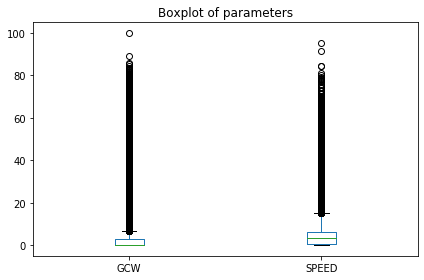

In [10]:
#Boxplot chart for outlier visualization
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.autolayout"] = True
ax = datasetInterview_new[['GCW', 'SPEED']].plot(kind='box', title='Boxplot of parameters')

In [11]:
# Removing outliers based on the boxplot chart
datasetInterview_new = datasetInterview_new[datasetInterview_new['SLOPE_2']<=9.8]
datasetInterview_new = datasetInterview_new[datasetInterview_new['SLOPE_3']<=9.8]

In [12]:
#Comparison of Data Amount after Outliers Excluded
print('Total of rows before removing outliers:', '582564')
print('Total of rows after removing outliers:',len(datasetInterview_new))

reduction_data = ((len(datasetInterview_new)*100)/(582564))-100

print("Reduction of", abs(round(reduction_data,4)), "% in relation with the data before removing outliers")

Total of rows before removing outliers: 582564
Total of rows after removing outliers: 582450
Reduction of 0.0196 % in relation with the data before removing outliers


In [15]:
#Creating dataframe for Required variable (x) and desired variable (y)
parameter_x=['IDX', 'DRIVE_SPEED','GCW', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3', 'SPEED']
parameter_y=['FUEL_EFF']

x = datasetInterview_new[parameter_x]
y = datasetInterview_new[parameter_y]

In [16]:
#Normalization based on the data of interest (FUEL_EFF)
norm = list(x.columns)

x[norm] = MinMaxScaler().fit_transform(x[norm])

xdf=x.copy()
ydf=y.copy()

In [17]:
#Measurement verification of the parameter of interest
ydf.median()

FUEL_EFF    3.2
dtype: float64

In [18]:
#Transform to np.array
columns_xdf=xdf.columns
xdf = np.array(xdf, dtype=float)
ydf = np.array(ydf, dtype=float)

In [19]:
#Substitution of NAN values for mean
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(xdf)
y_imputed = imputer.fit_transform(ydf)


In [20]:
#Statistical regression test for parameter correlation 
fs_selector = SelectKBest(f_regression, k=int(len(list(columns_xdf)) / 3))
fs_selector.fit(x_imputed, y_imputed)
fs_support = fs_selector.get_support()

feature_selection_df = pd.DataFrame({'Feature': columns_xdf, 'fs': fs_support})

C:\Users\annew\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
##Creating dataframe for Required variable (x) and desired variable (y)
df2=datasetInterview_new.copy()

y_FUEL_EFF = 'FUEL_EFF'

columns1 = list(columns_xdf)
columns1.append(y_FUEL_EFF)

In [22]:
#Test Spearman and Pearson method
df2 = df2[columns1]
df2 = df2.astype('float')

corr_sperman = df2.corr(method='spearman')
corr2_pearson = df2.corr(method='pearson')


metrics = pd.DataFrame(corr_sperman[y_FUEL_EFF].index, columns=['Features'])
metrics['Spearman'] = corr_sperman[y_FUEL_EFF].values
metrics['Pearson'] = corr2_pearson[y_FUEL_EFF].values

In [23]:
#Creating dataframe with statistical correlation (fs, Spearman and Pearson) of required variable (x) and desired variable (y)
for i, row in feature_selection_df.iterrows():
    df_int=metrics[metrics['Features']==row['Feature']]
    feature_selection_df.at[i, 'Spearman'] = abs(round(df_int['Spearman'].values[0],3))
    feature_selection_df.at[i, 'Pearson'] = abs(round(df_int['Pearson'].values[0],3))

feature_selection_df=feature_selection_df.sort_values(by='Spearman',ascending=False)
    
(feature_selection_df)

,Feature,fs,Spearman,Pearson
1,DRIVE_SPEED,True,0.661,0.722
3,SLOPE_1,True,0.366,0.567
5,SLOPE_3,False,0.285,0.499
4,SLOPE_2,False,0.198,0.294
2,GCW,False,0.053,0.000
6,SPEED,False,0.042,0.000
0,IDX,False,0.000,0.000


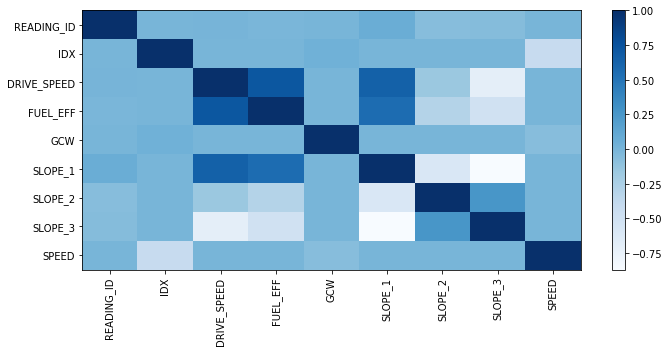

In [24]:
#Spearman correlation
corr = datasetInterview_new.corr()
plt.figure(figsize=[10,5])
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation='vertical')
plt.yticks(range(len(corr)),corr.columns);
#plt.suptitle('Spearman correlation' ,fontsize=10, fontweight='bold')
plt.grid(False)
plt.show()

In [25]:
#Correlation between parameter with kendall method
correlation_DRIVE_SPEED = datasetInterview_new['DRIVE_SPEED'].corr(datasetInterview_new['FUEL_EFF'], method='kendall')
correlation_GCW = datasetInterview_new['GCW'].corr(datasetInterview_new['FUEL_EFF'], method='kendall')
correlation_SLOPE_1 = datasetInterview_new['SLOPE_1'].corr(datasetInterview_new['FUEL_EFF'], method='kendall')
correlation_SLOPE_2 = datasetInterview_new['SLOPE_2'].corr(datasetInterview_new['FUEL_EFF'], method='kendall')
correlation_SLOPE_3 = datasetInterview_new['SLOPE_3'].corr(datasetInterview_new['FUEL_EFF'], method='kendall')
correlation_SPEED = datasetInterview_new['SPEED'].corr(datasetInterview_new['FUEL_EFF'], method='kendall')


print('The correlation of DRIVE_SPEED and FUEL_EFF is:', correlation_DRIVE_SPEED)
print('The correlation of GCW and FUEL_EFF is:', correlation_GCW)
print('The correlation of SLOPE_1 and FUEL_EFF is:', correlation_SLOPE_1)
print('The correlation of SLOPE_2 and FUEL_EFF is:', correlation_SLOPE_2)
print('The correlation of SLOPE_3 and FUEL_EFF is:', correlation_SLOPE_3)
print('The correlation of SPEED and FUEL_EFF is:', correlation_SPEED)

The correlation of DRIVE_SPEED and FUEL_EFF is: 0.48796617321308733
The correlation of GCW and FUEL_EFF is: -0.03762867631865368
The correlation of SLOPE_1 and FUEL_EFF is: 0.2570504073399754
The correlation of SLOPE_2 and FUEL_EFF is: -0.13474003539226737
The correlation of SLOPE_3 and FUEL_EFF is: -0.19349677737337678
The correlation of SPEED and FUEL_EFF is: 0.025533105101068702


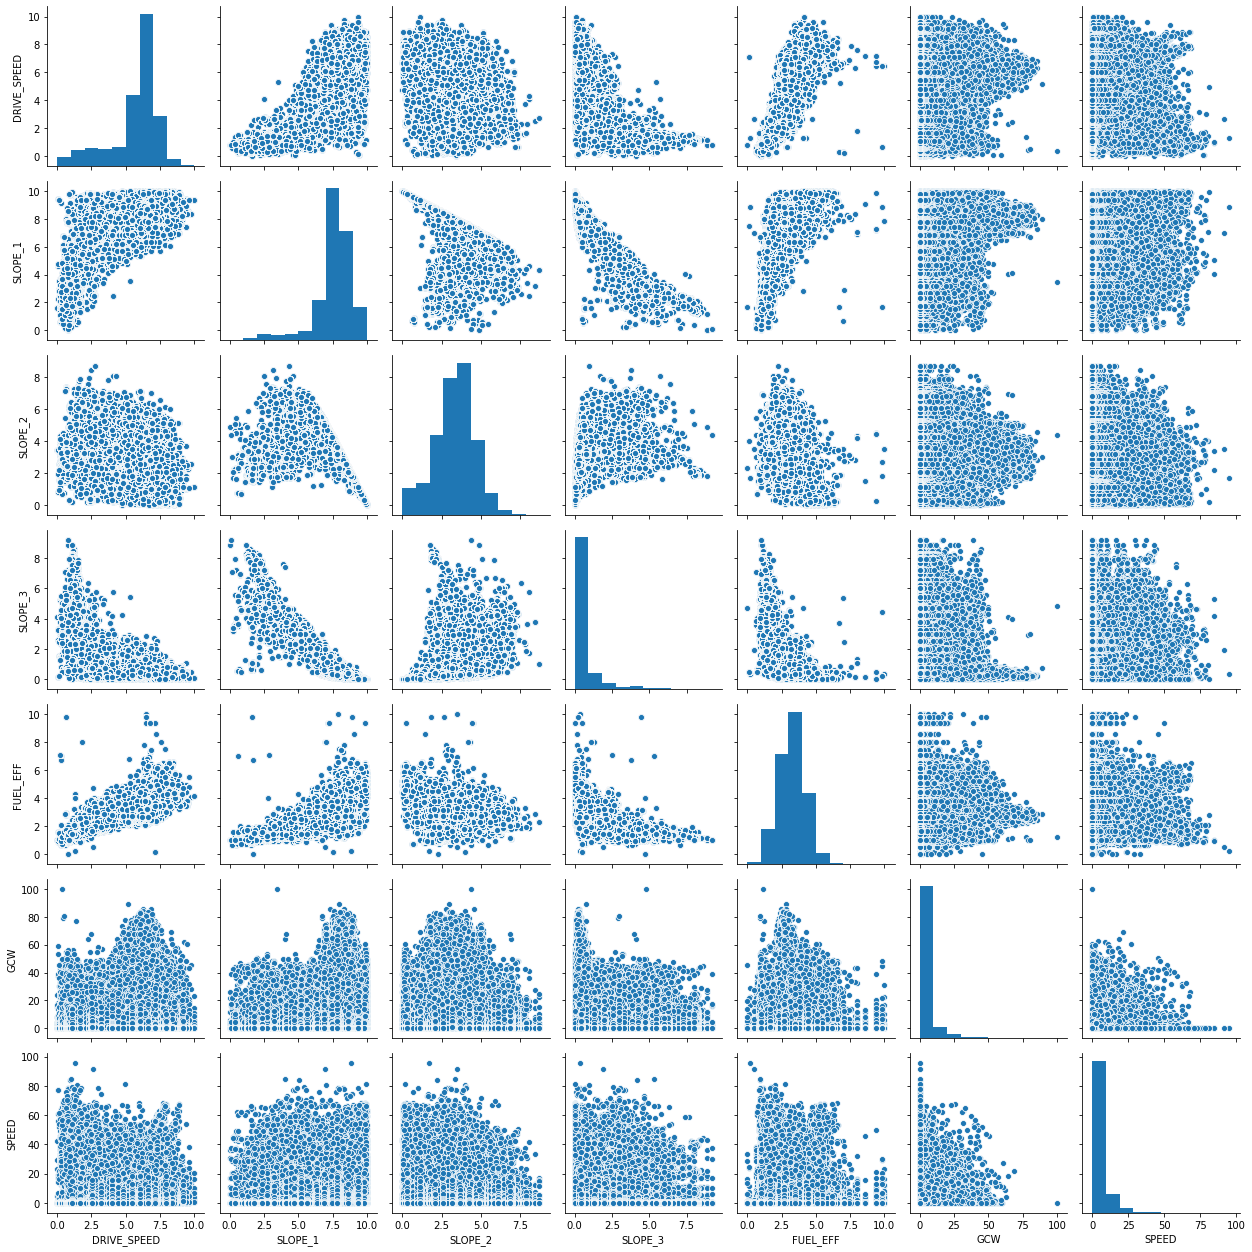

In [26]:
#Graphics of data 
sns.pairplot(datasetInterview_new[['DRIVE_SPEED','SLOPE_1','SLOPE_2','SLOPE_3','FUEL_EFF','GCW','SPEED']])

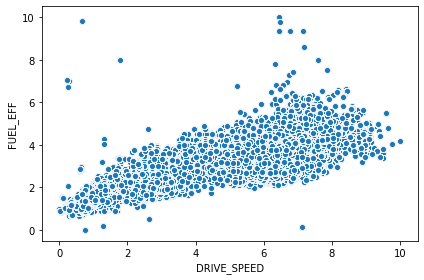

In [18]:
##Column chart Category_GCW x FUEL_EFF

sns.scatterplot(x='DRIVE_SPEED', y='FUEL_EFF', data=datasetInterview_new)

In [30]:
#Defining categories based on GCW and SPEED
datasetInterview_category = pd.DataFrame(datasetInterview_new)

range_GCW_SPEED = [-1, 5, 25, 50, 75, 100]
labels_GCW = ['GCW1', 'GCW2', 'GCW3', 'GCW4', 'GCW5'] 
labels_SPEED = ['SPEED1', 'SPEED2', 'SPEED3', 'SPEED4', 'SPEED5']

#Adding a new column with the category corresponding
datasetInterview_category['Category_GCW'] = pd.cut(datasetInterview_category['GCW'], bins=range_GCW_SPEED, labels=labels_GCW)
datasetInterview_category['Category_SPEED'] = pd.cut(datasetInterview_category['SPEED'], bins=range_GCW_SPEED, labels=labels_SPEED)


In [31]:
datasetInterview_category

,READING_ID,IDX,DRIVE_SPEED,FUEL_EFF,GCW,SLOPE_1,SLOPE_2,SLOPE_3,SPEED,Category_GCW,Category_SPEED
0,0,0,7.40,3.76,NaN,7.66,3.81,0.37,NaN,NaN,NaN
1,0,1,7.40,3.76,0.00,7.66,3.81,0.37,23.36,GCW1,SPEED2
2,0,2,7.40,3.76,0.00,7.66,3.81,0.37,2.55,GCW1,SPEED1
3,0,3,7.40,3.76,1.32,7.66,3.81,0.37,2.19,GCW1,SPEED1
4,0,4,7.40,3.76,0.00,7.66,3.81,0.37,1.09,GCW1,SPEED1
...,...,...,...,...,...,...,...,...,...,...,...
582535,1136694952,25,7.95,5.09,0.00,8.61,2.08,0.40,NaN,GCW1,NaN
582536,1136694952,26,7.95,5.09,0.00,8.61,2.08,0.40,NaN,GCW1,NaN
582537,1136694952,27,7.95,5.09,0.00,8.61,2.08,0.40,NaN,GCW1,NaN
582538,1136694952,28,7.95,5.09,0.00,8.61,2.08,0.40,NaN,GCW1,NaN


In [32]:
#Mean of FUEL_EFF group by category_GCW
mean_FUEL_GCW = datasetInterview_category.groupby('Category_GCW')['FUEL_EFF'].mean()
mean_FUEL_GCW

Category_GCW
GCW1    3.277940
GCW2    3.307636
GCW3    3.409796
GCW4    2.876323
GCW5    2.657571
Name: FUEL_EFF, dtype: float64

In [34]:
#Mean of FUEL_EFF group by category_SPEED
mean_SPEED_GCW = datasetInterview_category.groupby('Category_SPEED')['FUEL_EFF'].mean()
mean_SPEED_GCW

Category_SPEED
SPEED1    3.295907
SPEED2    3.275012
SPEED3    2.970281
SPEED4    3.053752
SPEED5    1.359474
Name: FUEL_EFF, dtype: float64

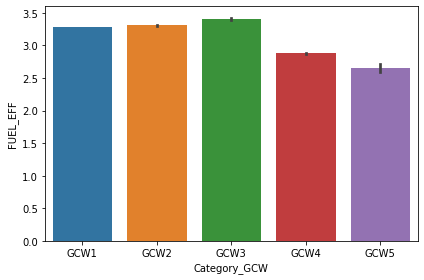

In [35]:
##Column chart Category_GCW x FUEL_EFF
sns.barplot(x='Category_GCW', y='FUEL_EFF', data=datasetInterview_category)

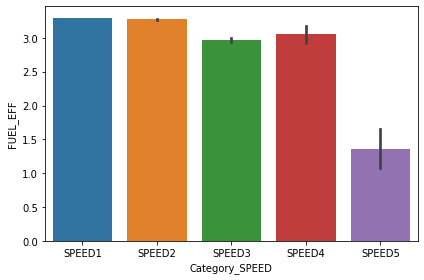

In [36]:
#Column chart Category_SPEED x FUEL_EFF
sns.barplot(x='Category_SPEED', y='FUEL_EFF', data=datasetInterview_category)

In [21]:
#Suggestion for further statistical analysis to compare variables
mi_selector = SelectKBest(mutual_info_regression, k=int(len(list(colunas)) / 3))
mi_selector.fit(x_imputed, y_imputed)
mi_support = mi_selector.get_support()

rfe_selector = RFE(estimator=SVR(kernel='linear'), n_features_to_select=int(len(list(colunas)) / 3), step=1)
rfe_selector.fit(x_imputed, y_imputed)
rfe_support = rfe_selector.get_support()

rf_selector = RFE(estimator=RandomForestRegressor(), n_features_to_select=int(len(list(colunas)) / 3), step=1)
rf_selector.fit(x_imputed, y_imputed)
rf_support = rf_selector.get_support()

NameError: name 'colunas' is not defined